# Importing Libraries

In [1]:
import Network
import Learning
import matplotlib.pyplot as plt
import numpy as np
import Snake_Engine

# Setting up Loss function

In [2]:
def lossFunction(net):
    
    runs = 100
    games = [Snake_Engine.Board() for i in range(runs)]

    while all_end(games) == False:
        inputs = [game.get_inputs() for game in games]
        #for input in inputs:
            #print(np.shape(input))
        #print(np.shape(inputs),'asa')
        outputs = net.forward(inputs)

        for i in range(runs):
            if games[i].end: #if game has ended
                pass
            else:
                move = np.argmax(outputs[i])
                games[i].push(move)

    total_points = 0
    for game in games:
        total_points = total_points + game.food_points + game.move_points

    return 1/(total_points/runs)
            


def all_end(games): #checks if all games have ended
    for game in games:
        if game.end == True:
            pass
        else:
            return False
    return True

    

# Creating Network

In [3]:
test_net = Network.network(24,4)
test_net.add_layer(Network.layer_dense(24,8))
test_net.add_layer(Network.relu())
test_net.add_layer(Network.layer_dense(8,8))
test_net.add_layer(Network.relu())
test_net.add_layer(Network.layer_dense(8,4))
test_net.add_layer(Network.softmax())

lossFunction(test_net)

0.058823529411764705

In [4]:
steps = [1,2,4,8,16,32]
print(steps)
losses = []
for step in steps:
    loss,_ = Learning.random_learning(test_net,lossFunction,max_mutations = 100,threshold = 1e-7,info=True,step=step)
    losses = losses + loss


[1, 2, 4, 8, 16, 32]
Iter 0 Loss 0.014925373134328358
Iter 1 Loss 0.010356255178127589
Iter 2 Loss 0.00973709834469328
Iter 3 Loss 0.006014314067480603
Iter 4 Loss 0.005923819678928973
Iter 5 Loss 0.0037174721189591076
Iter 6 Loss 0.003253619651862697
Iter 7 Loss 0.003232584451268789
Iter 8 Loss 0.0031316547663785546


C:\Users\wwden\OneDrive\Documents\GitHub\Hello-World-Net\V2 - Aug'23\Network.py:101: RuntimeWarning: overflow encountered in exp
  self.function = lambda x : np.exp(x) / np.sum(np.exp(x))
C:\Users\wwden\OneDrive\Documents\GitHub\Hello-World-Net\V2 - Aug'23\Network.py:101: RuntimeWarning: invalid value encountered in divide
  self.function = lambda x : np.exp(x) / np.sum(np.exp(x))


Iter 9 Loss 0.0030381285128360932
Iter 10 Loss 0.0021692444521573136
Stopped Due to Max Mutations Reached
Iter 0 Loss 0.003984381225595665
Iter 1 Loss 0.002935995302407516
Iter 2 Loss 0.0027987685418415895
Iter 3 Loss 0.002516166368920313
Stopped Due to Max Mutations Reached
Iter 0 Loss 0.005351027397260274
Iter 1 Loss 0.0050934650842968466
Iter 2 Loss 0.004836993324949211
Iter 3 Loss 0.003886664852889735
Iter 4 Loss 0.003841868684928349
Iter 5 Loss 0.0037370604282671253
Iter 6 Loss 0.0032562683165092803
Iter 7 Loss 0.003244751614263928
Iter 8 Loss 0.0029655111058390915
Iter 9 Loss 0.0028789405498776447
Iter 10 Loss 0.002650902632346314
Iter 11 Loss 0.0026489364520145163
Iter 12 Loss 0.0025806451612903226
Iter 13 Loss 0.0024542888697999753
Iter 14 Loss 0.0024481602076039857
Iter 15 Loss 0.0023936042893388867
Iter 16 Loss 0.0022715398768825387
Iter 17 Loss 0.0021794564435629756
Iter 18 Loss 0.002140502590008134
Iter 19 Loss 0.0020113439800474677
Iter 20 Loss 0.0018926847733509982
Iter 2

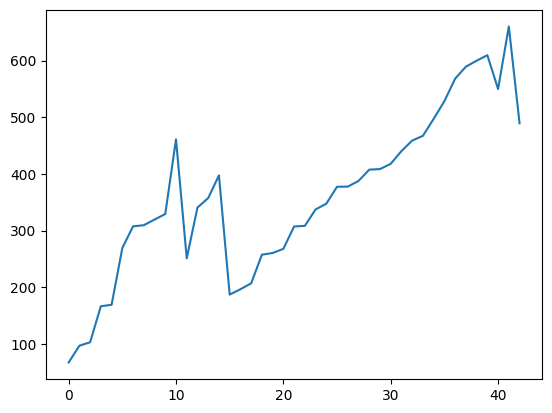

In [5]:
plt.plot([1/l for l in losses])


In [6]:

game = Snake_Engine.Board()
while game.end == False:
    game.push(np.argmax(test_net.forward([game.get_inputs()])))
    print(game)

X X X X X X X X X X X X X X X 
X                           X 
X                           X 
X                           X 
X                 F         X 
X             H             X 
X             B             X 
X             B             X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X X X X X X X X X X X X X X X 
X X X X X X X X X X X X X X X 
X                           X 
X                           X 
X                           X 
X             H   F         X 
X             B             X 
X             B             X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X                           X 
X X X X X X X X X X X X X X X 
X X X X X X X X X X X X X X X 
X                           X 
X       

In [7]:
game.food_points+game.move_points

1005